In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
kickstarter_cleaned = pd.read_csv('kickstarter_cleaned_index.csv')
new_kickstarter_cleaned = kickstarter_cleaned.drop(columns='Unnamed: 0')

Extremely Successful Kickstarters

In [3]:
new_kickstarter_cleaned['percent_funded'] = np.round((new_kickstarter_cleaned['usd_pledged_real'] / new_kickstarter_cleaned['usd_goal_real']),3)
new_kickstarter_cleaned['percent_funded'].describe()

count    323043.000000
mean          3.786474
std         288.966304
min           0.000000
25%           0.025000
50%           0.275000
75%           1.106000
max      104277.890000
Name: percent_funded, dtype: float64

In [11]:
extremelyFunded = new_kickstarter_cleaned['percent_funded'] > 100 and new_kickstarter_cleaned['goal']
print(extremelyFunded.shape)
new_kickstarter_cleaned.sort_values(by = 'percent_funded',ascending = False)

(323043,)


,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
314975,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17 00:00:00,1.00,2016-08-18 09:04:03,1,3917,US,104277.89,1.00,59,26.621876,104277.890
158899,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13 00:00:00,1.00,2016-10-14 19:04:27,1,955,US,68764.10,1.00,59,72.004293,68764.100
307740,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09 00:00:00,1.00,2015-08-10 19:31:56,1,1673,US,55266.57,1.00,59,33.034411,55266.570
65151,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10 00:00:00,1.00,2013-05-10 01:22:38,1,1622,US,41535.01,1.00,30,25.607281,41535.010
69465,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02 00:00:00,1.00,2016-07-12 00:29:12,1,268,US,32843.00,1.00,20,122.548507,32843.000
243516,521903377,CLOCKWRIGHT: Large-Scale Analogue Time Machines,Sculpture,Art,USD,2016-01-13 00:00:00,1.00,2015-12-14 12:57:33,1,162,US,27588.23,1.00,29,170.297716,27588.230
315006,951161619,Heartbreak Hits – Theo Katzman's Second LP,Music,Music,USD,2017-01-03 00:00:00,1.00,2016-11-04 15:52:18,1,665,US,24675.00,1.00,59,37.105263,24675.000
248236,550443638,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31 00:00:00,10.00,2013-05-08 20:02:14,1,5001,US,230360.67,10.00,22,46.062921,23036.067
13083,1077219132,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13 00:00:00,1.00,2016-09-13 18:03:12,1,163,US,22603.00,1.00,29,138.668712,22603.000
140465,1836862932,CO-OP THE GAME (Canceled),Video Games,Games,CAD,2013-10-14 00:00:00,1.00,2013-09-09 23:15:12,canceled,35,CA,16461.73,0.97,34,470.335143,16970.856


In [12]:
extremelyFundedKickstarters = new_kickstarter_cleaned[extremelyFunded].sort_values(by='percent_funded',ascending=False)

extremelyFundedKickstarters.head()

,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,percent_funded
314975,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17 00:00:00,1.0,2016-08-18 09:04:03,1,3917,US,104277.89,1.0,59,26.621876,104277.89
158899,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13 00:00:00,1.0,2016-10-14 19:04:27,1,955,US,68764.10,1.0,59,72.004293,68764.10
307740,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09 00:00:00,1.0,2015-08-10 19:31:56,1,1673,US,55266.57,1.0,59,33.034411,55266.57
65151,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10 00:00:00,1.0,2013-05-10 01:22:38,1,1622,US,41535.01,1.0,30,25.607281,41535.01
69465,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02 00:00:00,1.0,2016-07-12 00:29:12,1,268,US,32843.00,1.0,20,122.548507,32843.00


In [13]:
extremelyFundedKickstarters['usd_goal_real'].value_counts()

1.00         165
100.00        19
5.00          18
10.00         16
25.00          9
15.00          7
1000.00        6
5000.00        6
500.00         6
10000.00       6
20.00          5
0.75           5
3.00           3
2.00           3
300.00         3
30000.00       3
108.00         3
1.09           2
7.00           2
100000.00      2
13.00          2
50000.00       2
0.77           2
30.00          2
0.78           2
8.00           2
35.00          2
28.25          1
4000.00        1
33.00          1
            ... 
1277.99        1
60.89          1
1.23           1
359.01         1
1195.22        1
1250.00        1
15000.00       1
1.11           1
13.36          1
1.57           1
10.69          1
1.33           1
0.74           1
0.76           1
5.80           1
83.70          1
4473.94        1
316.04         1
392.96         1
25000.00       1
7.79           1
1.18           1
0.72           1
3000.00        1
20000.00       1
40000.00       1
0.01           1
38.11         

In [14]:
#category with most anomalies
extremelyFundedKickstarters.main_category.value_counts()

Games           95
Music           74
Design          41
Comics          36
Film & Video    31
Technology      30
Art             30
Publishing      22
Fashion         10
Food             8
Crafts           4
Theater          2
Journalism       1
Photography      1
Name: main_category, dtype: int64

In [22]:
#take out goals that are too small

reasonable_goal = (new_kickstarter_cleaned['percent_funded'] > 100) & (new_kickstarter_cleaned['goal'] >= 100)

newExtremeFunded = new_kickstarter_cleaned[reasonable_goal]
newExtremeFunded.sort_values(by='percent_funded',ascending=False).head()


newExtremeFunded.main_category.value_counts()

#newExtremeFunded.groupby('main_category')

Games         40
Design        26
Technology    12
Music          4
Art            4
Fashion        2
Name: main_category, dtype: int64

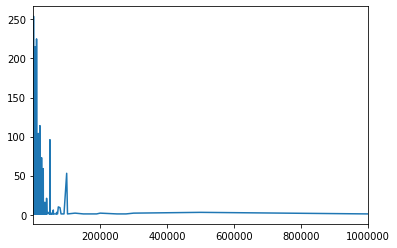

In [7]:
extremelyFundedKickstarters['usd_goal_real'].value_counts().sort_index().plot()

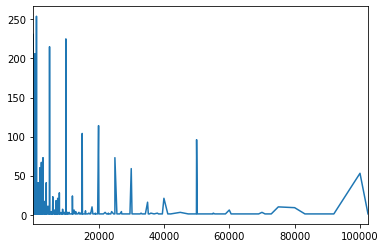

In [8]:
extremelyFundedKickstarters[extremelyFundedKickstarters['usd_goal_real'] <= 120000]['usd_goal_real'].value_counts().sort_index().plot()

In [9]:
extremelyFundedKickstarters['usd_goal_real'].describe()

count       4188.000000
mean        9485.558532
std        28416.869013
min            0.010000
25%          166.702500
50%         1150.000000
75%        10000.000000
max      1000000.000000
Name: usd_goal_real, dtype: float64

In [10]:
extremelyFundedKickstarters[extremelyFundedKickstarters['usd_goal_real'] <= 10000]['usd_goal_real'].describe()

count     3339.000000
mean      2144.299793
std       2980.620324
min          0.010000
25%        100.000000
50%        689.740000
75%       3000.000000
max      10000.000000
Name: usd_goal_real, dtype: float64

In [11]:
extremelyFundedKickstarters.groupby('main_category')['percent_funded'].describe()

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,234.0,216.125734,1914.148511,10.003000,12.605674,19.183099,44.626800,27588.230000
Comics,203.0,285.992601,776.909030,10.042490,12.516626,18.109447,48.739015,5514.000000
Crafts,125.0,135.472248,1130.120984,10.026667,12.155386,17.164000,25.554240,12575.150000
Dance,3.0,42.583333,49.793532,11.250000,13.875000,16.500000,58.250000,100.000000
Design,951.0,38.830618,117.470796,10.017821,13.132238,17.809406,32.009200,2067.000000
Fashion,184.0,63.283431,355.080289,10.043070,13.338067,17.178105,30.215229,4684.000000
Film & Video,108.0,582.394948,1854.264224,10.084911,16.019737,32.710050,156.500000,15066.000000
Food,115.0,91.835566,525.331534,10.049489,13.519937,19.212000,33.918000,5549.283000
Games,1295.0,178.364126,1742.198465,10.003325,12.489968,17.827062,33.402467,41535.010000


Average Pledge

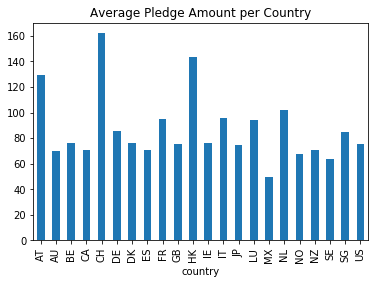

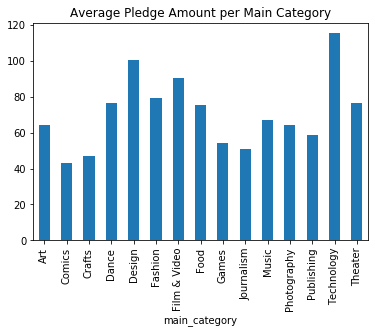